In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_context('talk')
sns.set_style('darkgrid')

In [2]:
# update with your filpath to location of 'annual_state_summs_2010_2016.csv'
filepath = '../scratch_data/pdf_extracts/resulting_csvs/'
all_states = pd.read_csv(filepath + 'annual_state_summs_2010_2016.csv')

In [3]:
#re-feng shui dataframe for easy plotting
all_states.rename(columns = {'wildfires':'wild_ct', 'rx_fires':'rx_ct'}, inplace=True)
vert_all = pd.melt(all_states, id_vars=['year', 'state'], value_vars=['wild_ct', 'wild_acres',
                                                           'rx_ct','rx_acres'],
                 var_name='measure', value_name='value')

In [4]:
vert_all[['firetype', 'metric']] = vert_all['measure'].str.split('_', expand=True) 

In [5]:
vert_all.drop(columns = ['measure'], inplace=True)
vert_all = vert_all[['year', 'state', 'firetype', 'metric', 'value']]

In [6]:
vert_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      196 non-null    int64 
 1   state     196 non-null    object
 2   firetype  196 non-null    object
 3   metric    196 non-null    object
 4   value     196 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.8+ KB


In [7]:
#'value' col cast as object but turns out some values are str and some are floats
# make all str to drop special characters, recast

vert_all['value'] = vert_all['value'].astype('str')
vert_all['value'] = vert_all['value'].str.replace(',','').astype('float')


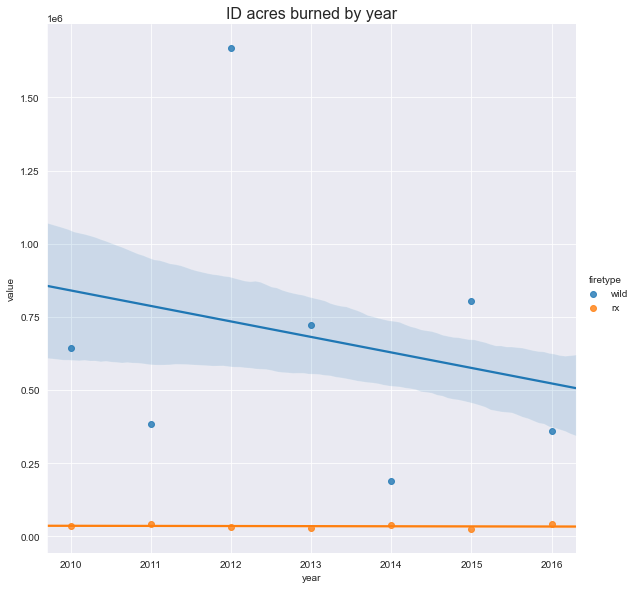

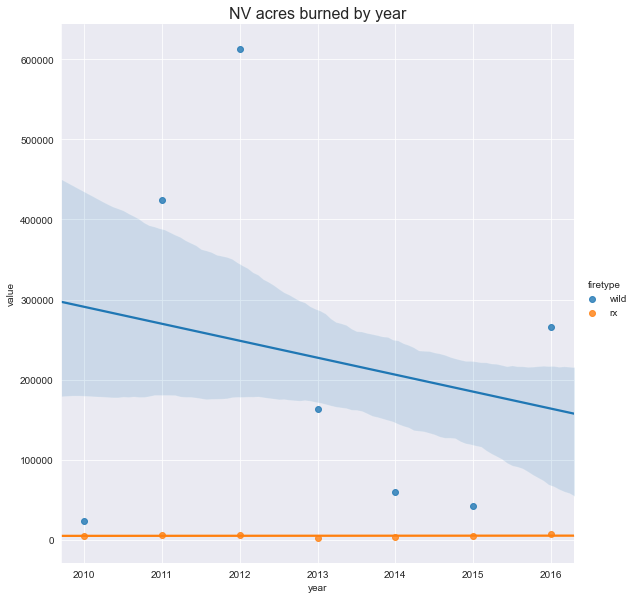

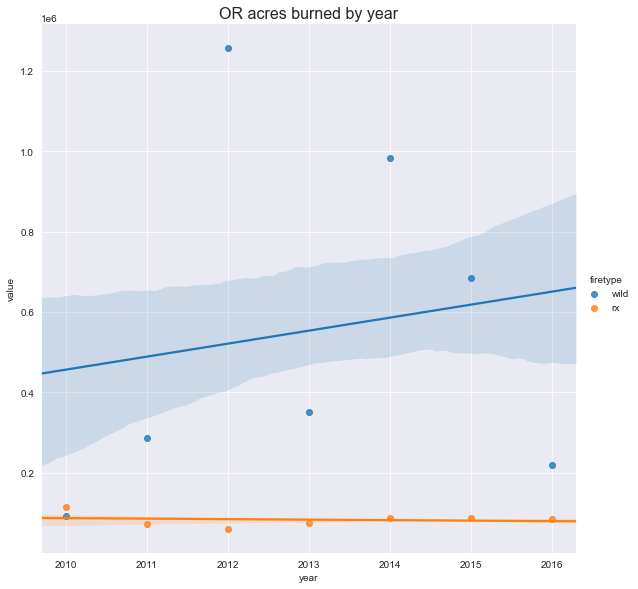

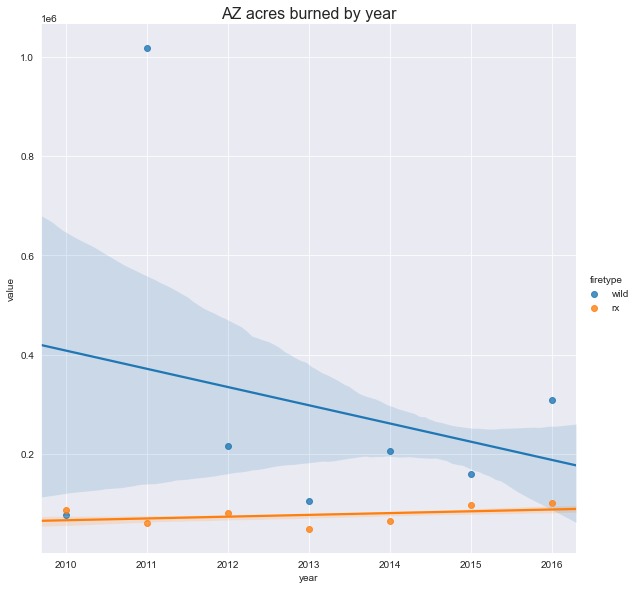

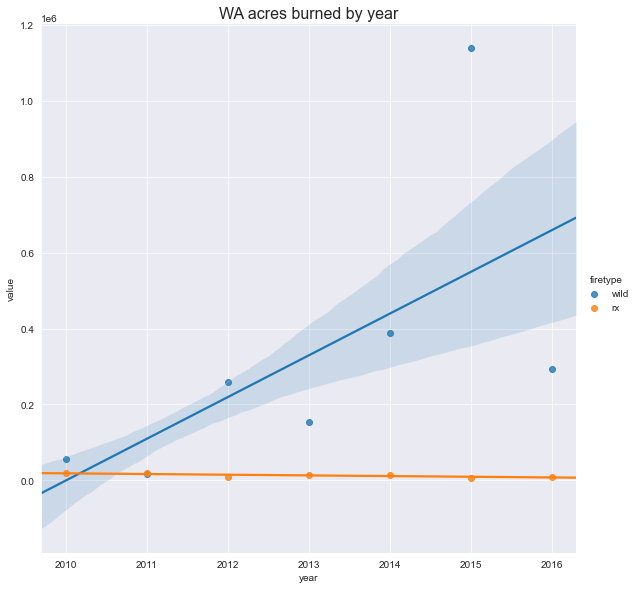

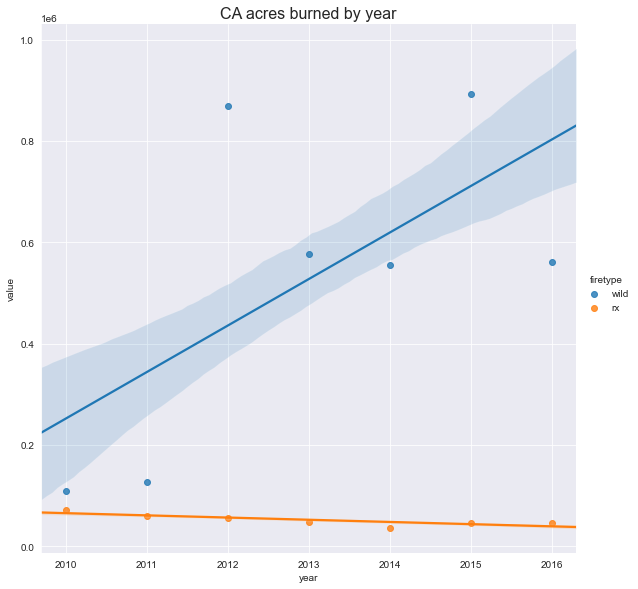

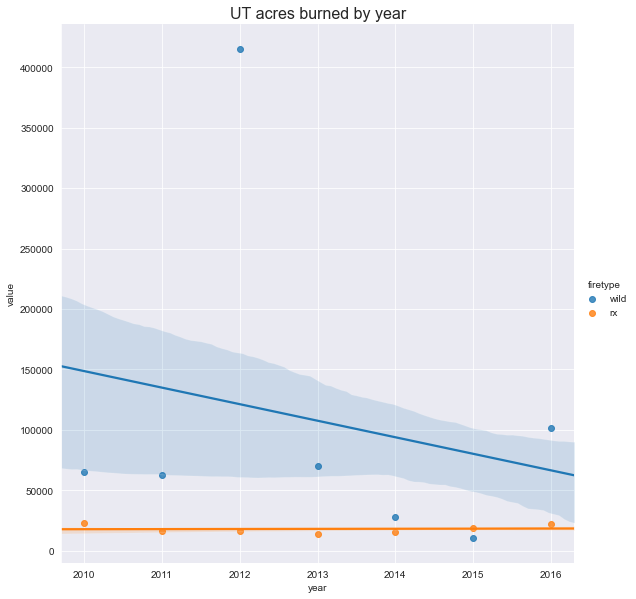

In [8]:
# annual acres by state : looped first, then individ plots to adjust axes/presentation details
# ended up going shared fixed axes, totally could have done that here -__-
states = set(vert_all['state'])
for i in states:
    temp_df = vert_all.loc[vert_all['state'] == i]
    sns.lmplot(data=temp_df.loc[temp_df['metric']=='acres'], x='year', y='value', hue='firetype',
              legend_out=True, truncate=False, height=8, ci=50)
    plt.title(f'{i} acres burned by year', size=16);

### And generate individually for presentation
To play with aesthetics

<Figure size 2160x2160 with 0 Axes>

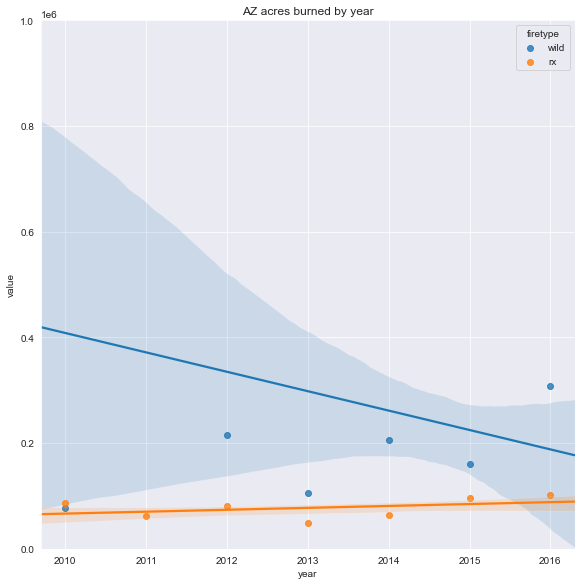

In [9]:
az = vert_all.loc[vert_all['state'] == 'AZ']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=az.loc[az['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, height=8)
my_plot.set(ylim=(0, 1000000), title='AZ acres burned by year', )
plt.show();

<Figure size 2160x2160 with 0 Axes>

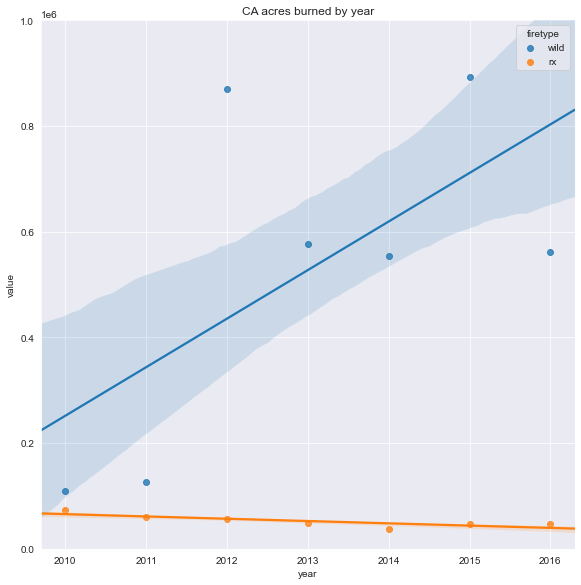

In [10]:
ca = vert_all.loc[vert_all['state'] == 'CA']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=ca.loc[ca['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, height=8)
my_plot.set(ylim=(0, 1000000), title='CA acres burned by year', )
plt.show();

<Figure size 2160x2160 with 0 Axes>

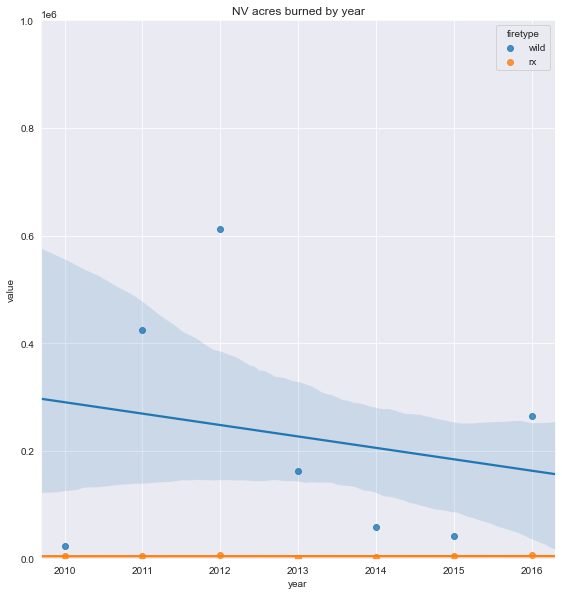

In [11]:
nv = vert_all.loc[vert_all['state'] == 'NV']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=nv.loc[nv['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, height=8)
my_plot.set(ylim=(0, 1000000), title='NV acres burned by year', )
plt.show();

<Figure size 2160x2160 with 0 Axes>

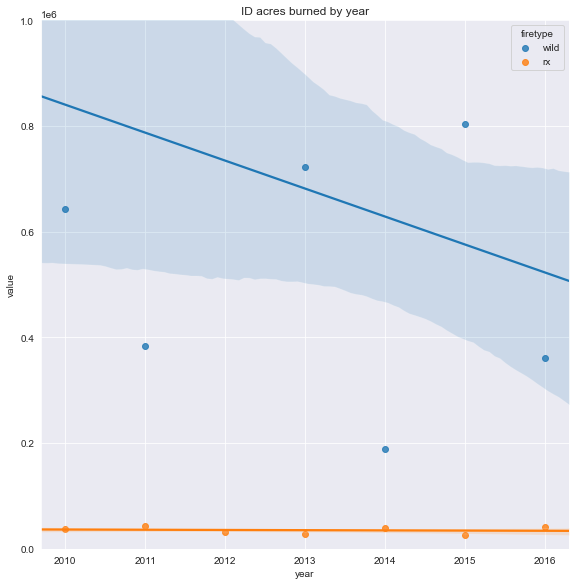

In [12]:
idaho = vert_all.loc[vert_all['state'] == 'ID']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=idaho.loc[idaho['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, height=8)
my_plot.set(ylim=(0, 1000000), title='ID acres burned by year', )
plt.show();

<Figure size 2160x2160 with 0 Axes>

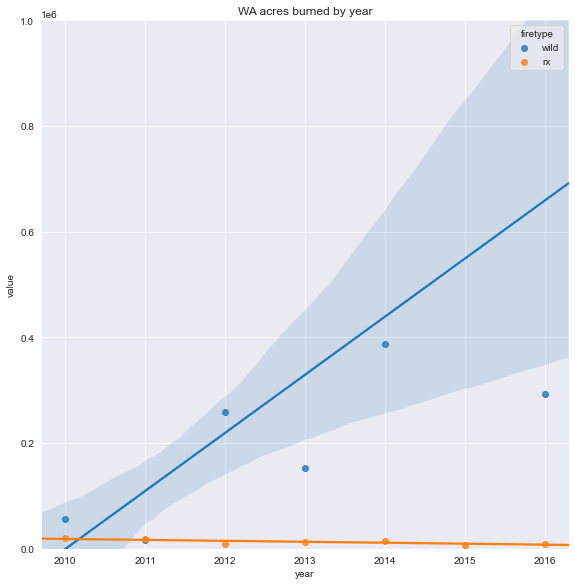

In [13]:
wa = vert_all.loc[vert_all['state'] == 'WA']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=wa.loc[wa['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, height=8)
my_plot.set(ylim=(0, 1000000), title='WA acres burned by year', )
plt.show();

<Figure size 2160x2160 with 0 Axes>

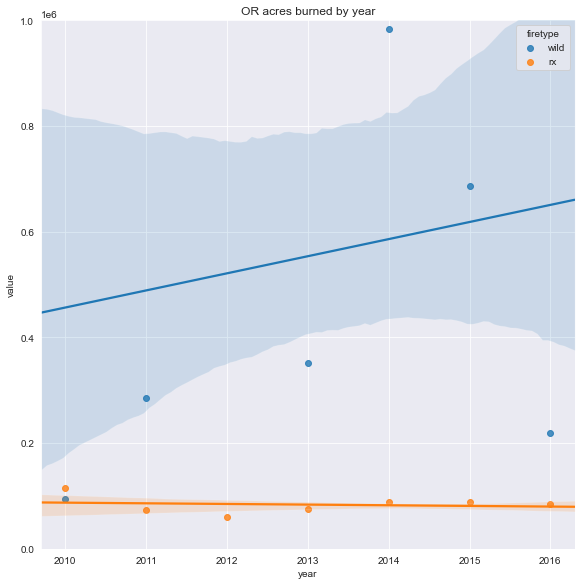

In [14]:
org = vert_all.loc[vert_all['state'] == 'OR']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=org.loc[org['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, height=8)
my_plot.set(ylim=(0, 1000000), title='OR acres burned by year')
plt.show();

<Figure size 2160x2160 with 0 Axes>

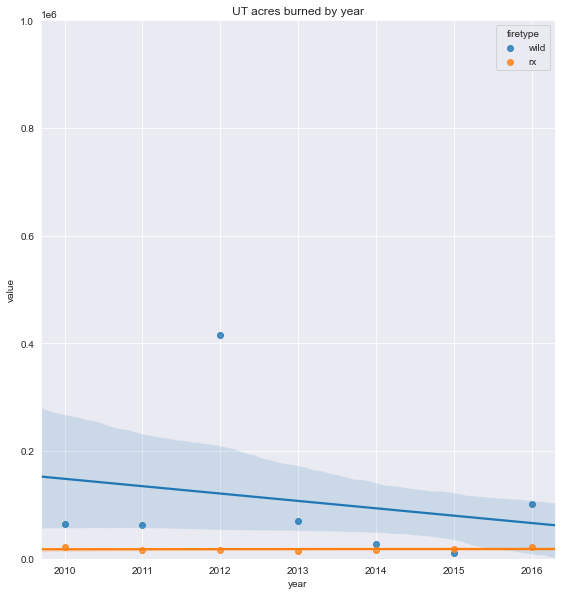

In [15]:
ut = vert_all.loc[vert_all['state'] == 'UT']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=ut.loc[ut['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, height=8)
my_plot.set(ylim=(0, 1000000), title='UT acres burned by year')
plt.show();

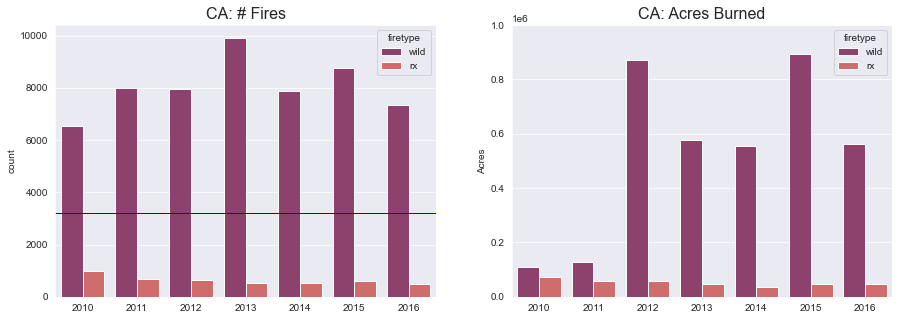

In [16]:
#also could've looped all this! didn't know how standardized the format would be until pau
#coolcoolcool
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=ca.loc[ca['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].axhline(y=3200, c='blue', linewidth=1)
ax[0].set_title("CA: # Fires", size=16)
ax[0].set(xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=ca.loc[ca['metric']=='acres'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('CA: Acres Burned', size=16)
ax[1].set(ylim=(0,1000000), xlabel='', ylabel='Acres');

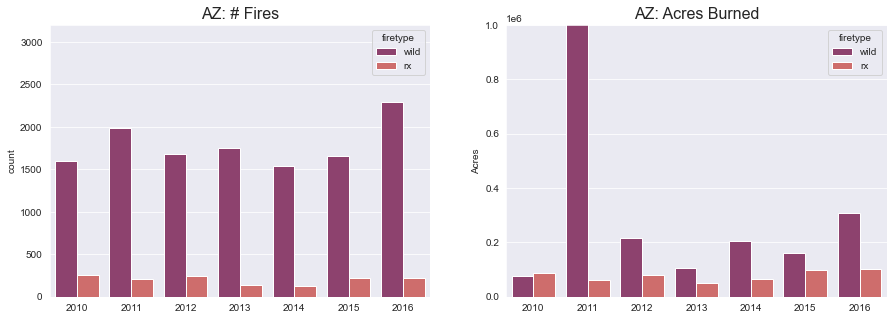

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=az.loc[az['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("AZ: # Fires", size=16)
ax[0].set(ylim=(0,3200), xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=az.loc[az['metric']=='acres'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('AZ: Acres Burned', size=16)
ax[1].set(ylim=(0,1000000), xlabel='', ylabel='Acres');

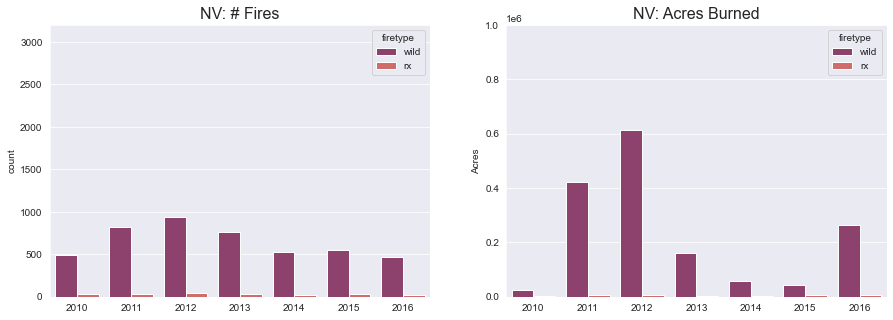

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=nv.loc[nv['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("NV: # Fires", size=16)
ax[0].set(ylim=(0,3200), xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=nv.loc[nv['metric']=='acres'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('NV: Acres Burned', size=16)
ax[1].set(ylim=(0,1000000), xlabel='', ylabel='Acres');

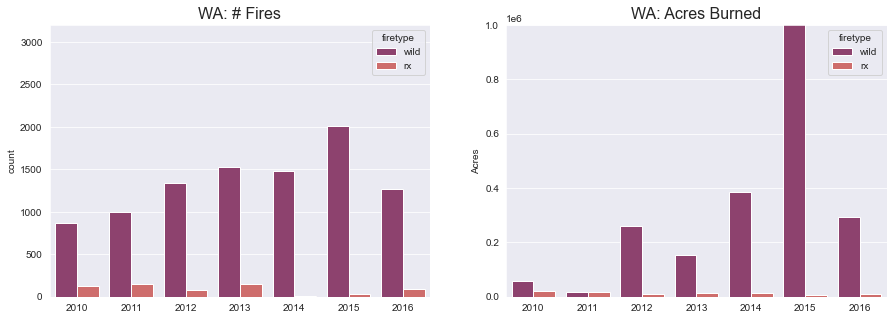

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=wa.loc[wa['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("WA: # Fires", size=16)
ax[0].set(ylim = (0,3200), xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=wa.loc[wa['metric']=='acres'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('WA: Acres Burned', size=16)
ax[1].set(ylim=(0,1000000), xlabel='', ylabel='Acres');

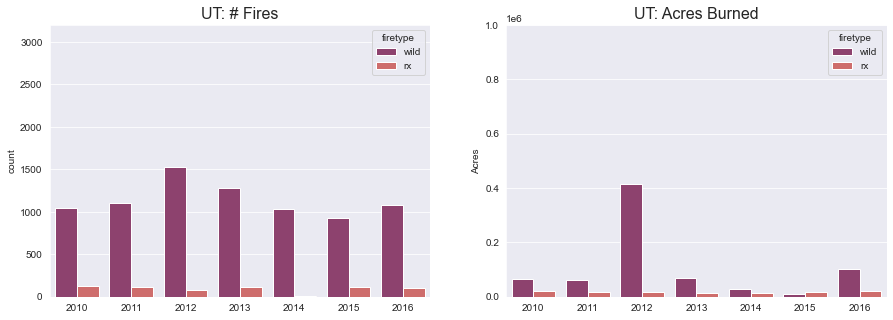

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=ut.loc[ut['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("UT: # Fires", size=16)
ax[0].set(ylim = (0,3200), xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=ut.loc[ut['metric']=='acres'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('UT: Acres Burned', size=16)
ax[1].set(ylim=(0,1000000), xlabel='', ylabel='Acres');

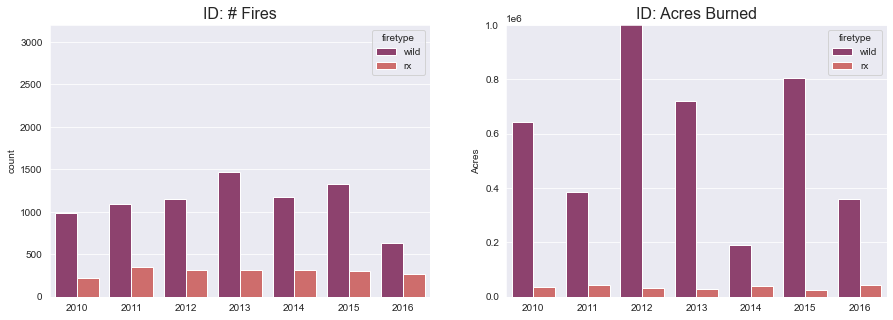

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=idaho.loc[idaho['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("ID: # Fires", size=16)
ax[0].set(ylim=(0,3200), xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=idaho.loc[idaho['metric']=='acres'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('ID: Acres Burned', size=16)
ax[1].set(ylim=(0,1000000), xlabel='', ylabel='Acres');

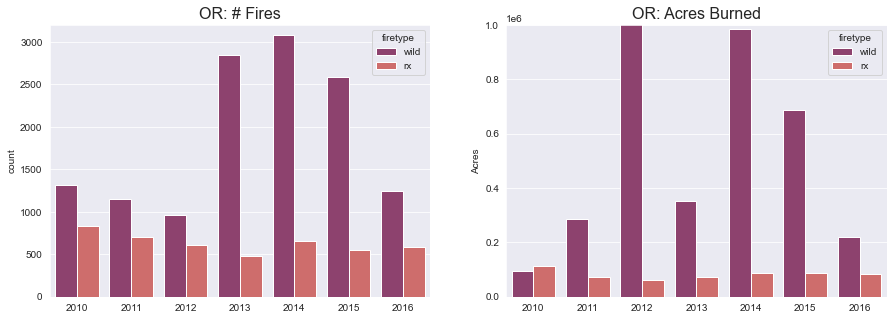

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=org.loc[org['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("OR: # Fires", size=16)
ax[0].set(ylim=(0,3200), xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=org.loc[org['metric']=='acres'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('OR: Acres Burned', size=16)
ax[1].set(ylim=(0,1000000), xlabel='', ylabel='Acres');